# Prediction of Marketing Campaign

## Importing Libraries

In [1]:
# Importing required libraries
import numpy as np                      # Linear algebra
import scipy                            # Statistics
import pandas as pd                     # Data processing
import matplotlib.pyplot as plt         # Graphs visualization
%matplotlib inline
import seaborn as sns                   # Statistical plots visualization

In [2]:
# Turning off warnings
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [3]:
# Importing dataset
df = pd.read_csv("marketing_trn_data.csv")

In [4]:
# View the dataset 
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,"$28,691.00",1,0,7/4/13,56,4,5,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,"$39,665.00",1,0,5/25/13,97,31,127,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,"$69,283.00",0,1,6/14/14,41,8,674,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,"$33,581.00",2,0,1/8/13,38,1,11,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,"$72,354.00",0,0,4/17/13,67,182,315,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,"$77,598.00",0,0,10/1/13,53,33,1193,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,"$62,670.00",0,1,2/2/14,57,38,539,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,"$44,953.00",0,0,12/21/12,31,124,728,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,"$27,469.00",0,0,8/2/12,2,0,9,...,0,0,0,3,6,0,0,0,0,0


In [5]:
target = pd.read_csv("marketing_trn_class_labels.csv", header = None)
target

,0,1
0,d1,0
1,d2,0
2,d3,0
3,d4,0
4,d5,0
...,...,...
2011,d2012,0
2012,d2013,0
2013,d2014,0
2014,d2015,0


### Description of the features
- **Year_Birth:-** Customer's Birth Year
- **Education:-** Customer's education level
- **Marital_Status:-** Customer's marital status
- **Income:-** Customer's yearly household income
- **Kidhome:-** Number of children in customer's household
- **Teenhome:-** Number of teenagers in customer's household
- **Dt_Customer:-** Date of customer's enrollment with the company
- **Recency:-** Number of days since customer's last purchase
- **MntWines:-** Amount spent on wine in the last 2 years
- **MntFruits:-** Amount spent on fruits in the last 2 years
- **MntMeatProducts:-** Amount spent on meat in the last 2 years
- **MntFishProducts:-** Amount spent on fish in the last 2 years
- **MntSweetProducts:-** Amount spent on sweets in the last 2 years
- **MntGoldProds:-** Amount spent on gold in the last 2 years
- **NumDealsPurchases:-** Number of purchases made with a discount
- **NumWebPurchases:-** Number of purchases made through the company's web site
- **NumCatalogPurchases:-** Number of purchases made using a catalogue
- **NumStorePurchases:-** Number of purchases made directly in stores
- **NumWebVisitsMonth:-** Number of visits to company's web site in the last month
- **AcceptedCmp1:-** Performance of the 1st campaign  
     1 if the 1st campaign is success, 0 if failure 
- **AcceptedCmp2:-** Performance of the 2nd campaign  
     1 if the 2nd campaign is success, 0 if failure
- **AcceptedCmp3:-** Performance of the 3rd campaign  
     1 if the 3rd campaign is success, 0 if failure
- **AcceptedCmp4:-** Performance of the 4th campaign  
     1 if the 4th campaign is success, 0 if failure
- **AcceptedCmp5:-** Performance of the 5th campaign  
     1 if the 5th campaign is success, 0 if failure
- **Complain:-** Customer complains in the last 2 years  
     1 if customer complained, 0 otherwise

### Tagret Variable:
- **Response:-** Performance of the latest campaign  
     1 if the latest campaign is success, 0 if failure

In [9]:
# View the 5 random entries from the dataset 
df.sample(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
276,1965,2n Cycle,Together,"$71,488.00",0,0,2/18/13,87,172,162,...,3,0,4,7,1,0,0,0,0,0
1741,1947,PhD,Widow,"$25,358.00",0,1,7/22/13,57,8,19,...,1,0,0,3,6,0,0,0,0,0
1718,1984,Graduation,Married,"$31,761.00",1,0,4/5/14,96,28,19,...,3,0,0,4,5,0,0,0,0,0
1715,1979,2n Cycle,Single,"$88,194.00",0,1,3/19/14,19,38,688,...,11,1,10,10,5,0,0,0,1,0
1012,1957,Graduation,Together,"$26,091.00",1,1,2/25/14,84,20,15,...,2,0,1,3,5,0,0,0,0,0


In [10]:
# Description of the dataset
df.describe()

,Year_Birth,Kidhome,Teenhome,Recency,MntGoldProds,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntMeatProducts,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,...,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,1968.775298,0.444444,0.508433,49.264385,43.929067,303.731151,26.663194,37.500496,27.252480,167.075893,...,4.113591,0.074405,2.643849,5.809524,5.318452,0.012401,0.072421,0.073909,0.063988,0.009921
std,12.026588,0.538253,0.546524,29.076028,52.189913,334.865183,39.965781,54.217172,41.214518,224.435284,...,2.804019,0.262494,2.876816,3.249803,2.398671,0.110694,0.259247,0.261687,0.244792,0.099132
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,0.000000,0.000000,24.000000,9.000000,24.000000,2.000000,3.000000,2.000000,16.000000,...,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,0.000000,0.000000,50.000000,24.000000,174.000000,8.000000,12.000000,8.000000,68.000000,...,4.000000,0.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,1.000000,1.000000,74.000000,56.000000,505.500000,34.000000,50.000000,34.000000,231.250000,...,6.000000,0.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,2.000000,2.000000,99.000000,362.000000,1493.000000,199.000000,258.000000,263.000000,1725.000000,...,27.000000,1.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Shape of the dataset
df.shape

(2016, 25)

## Cleaning the Dataset

In [12]:
# Cleaning up column names that contain whitespace
df.columns = df.columns.str.replace(' ', '')

In [13]:
# Transform Income column to a numerical
df["Income"] = df["Income"].str.replace('$', '')
df["Income"] = df["Income"].str.replace(",", "").astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2016 non-null   int64  
 1   Education            2016 non-null   object 
 2   Marital_Status       2016 non-null   object 
 3   Income               1995 non-null   float64
 4   Kidhome              2016 non-null   int64  
 5   Teenhome             2016 non-null   int64  
 6   Dt_Customer          2016 non-null   object 
 7   Recency              2016 non-null   int64  
 8   MntGoldProds         2016 non-null   int64  
 9   MntWines             2016 non-null   int64  
 10  MntFruits            2016 non-null   int64  
 11  MntFishProducts      2016 non-null   int64  
 12  MntSweetProducts     2016 non-null   int64  
 13  MntMeatProducts      2016 non-null   int64  
 14  NumDealsPurchases    2016 non-null   int64  
 15  NumWebPurchases      2016 non-null   i

## **Fixing the null values**

In [15]:
# Checking for the null values
df.isnull().sum().sort_values(ascending=False)

Income                 21
Year_Birth              0
MntMeatProducts         0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp2            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
AcceptedCmp3            0
NumWebPurchases         0
NumDealsPurchases       0
MntSweetProducts        0
Education               0
MntFishProducts         0
MntFruits               0
MntWines                0
MntGoldProds            0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Complain                0
dtype: int64

<AxesSubplot:xlabel='Income', ylabel='Count'>

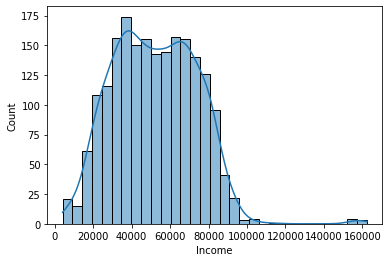

In [16]:
# Plotting 'Income' to get an idea of distribution
sns.histplot(df['Income'], kde = 20)

<AxesSubplot:title={'center':'Income'}, xlabel='Income'>

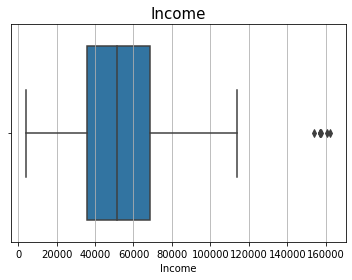

In [17]:
# Plotting the boxplot 'Income' to check for outlier in Income
plt.grid()
plt.title('Income',size=15)
sns.boxplot(df['Income'])

In [18]:
# Imputing null values with the median value (to avoid skewing of the mean due to outliers)
df['Income']=df['Income'].fillna(df['Income'].median())

In [19]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,28691.0,1,0,7/4/13,56,4,5,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,39665.0,1,0,5/25/13,97,31,127,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,69283.0,0,1,6/14/14,41,8,674,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,33581.0,2,0,1/8/13,38,1,11,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,72354.0,0,0,4/17/13,67,182,315,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,77598.0,0,0,10/1/13,53,33,1193,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,62670.0,0,1,2/2/14,57,38,539,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,44953.0,0,0,12/21/12,31,124,728,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,27469.0,0,0,8/2/12,2,0,9,...,0,0,0,3,6,0,0,0,0,0


## Feature Engineering

### **Transforming Features**

The variable Dt_Customer represents Date of customer's enrollment with the company so this should be in DateTime format.

In [20]:
# Converting datatype of Dt_Customer column to DataTime Format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2016 non-null   int64         
 1   Education            2016 non-null   object        
 2   Marital_Status       2016 non-null   object        
 3   Income               2016 non-null   float64       
 4   Kidhome              2016 non-null   int64         
 5   Teenhome             2016 non-null   int64         
 6   Dt_Customer          2016 non-null   datetime64[ns]
 7   Recency              2016 non-null   int64         
 8   MntGoldProds         2016 non-null   int64         
 9   MntWines             2016 non-null   int64         
 10  MntFruits            2016 non-null   int64         
 11  MntFishProducts      2016 non-null   int64         
 12  MntSweetProducts     2016 non-null   int64         
 13  MntMeatProducts      2016 non-nul

### **Useful variables that can be engineered with the given data.**

- Replace **birth year of customer (Year_Birth)** with the age of Customer ('Age')

In [22]:
# Age of customer
df.rename(columns = {'Year_Birth':'Age'}, inplace = True)
df['Age'] = df.Age.apply(lambda x: 2022-x)

- **The total number of children ('Children')** can be engineered with the sum of 'Kidhome' and 'Teenhome'

In [23]:
# Performing feature engineering.
df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(['Kidhome', 'Teenhome'], axis = 1)

- Modify **date of enrollment ('Dt_Customer')** to total days since enrollment ('TotalEnrollDays')

In [24]:
# Total number of days since enrollment of a customer with the company.
from datetime import date
df.rename(columns = {'Dt_Customer':'TotalEnrollDays'}, inplace = True)
df['TotalEnrollDays'] = pd.to_datetime(date.today()) - df['TotalEnrollDays']
df['TotalEnrollDays'] = [int(str(df['TotalEnrollDays'][x])[:4]) for x in df.index]

- **The total amount spent ('TotalMnt')** can be engineered from the sum of all features containing the keyword 'Mnt'

In [25]:
# The total amount spend in the last 2 years.
mnt_col = [i for i in df.columns if 'Mnt' in i]
df['TotalMnt'] = df[mnt_col].sum(axis=1)

- **The total purchases ('TotalPurchase')** can be engineered from the sum of all features containing the keyword 'Purchases'

In [26]:
# The total number of purchases made.
purchase_col = [j for j in df.columns if 'Purchase' in j]
df['TotalPurchase'] = df[purchase_col].sum(axis=1)

- **The total number of campaigns accepted ('TotalCampaignsAcc')** can be engineered from the sum of all features containing the keywords 'Cmp' and 'Response' (the latest campaign)

In [27]:
# The total campaigns in which customer accepted the offer.
campaigns_col = [c for c in df.columns if 'Cmp' in c]
df['TotalCampaignsAcc'] = df[campaigns_col].sum(axis=1)

In [28]:
# View the customer ID with new features.
df[['Age', 'Children', 'TotalEnrollDays', 'TotalMnt', 'TotalPurchase', 'TotalCampaignsAcc']]

,Age,Children,TotalEnrollDays,TotalMnt,TotalPurchase,TotalCampaignsAcc
0,33,1,3216,34,5,0
1,41,1,3256,216,12,1
2,47,1,2871,904,27,0
3,53,2,3393,17,4,0
4,29,0,3294,1228,19,0
...,...,...,...,...,...,...
2011,79,0,3127,1735,26,1
2012,68,1,3003,825,22,0
2013,41,0,3411,1021,24,1
2014,75,0,3552,17,4,0


In [29]:
df = df[['Age', 'Education', 'Marital_Status', 'Income', 'Children', 'TotalEnrollDays', 'Recency', 'MntGoldProds', 'MntWines',
         'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts', 'TotalMnt', 'NumDealsPurchases',
         'NumWebPurchases', 'NumCatalogPurchases', 'TotalPurchase', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
         'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'TotalCampaignsAcc', 'Complain']]

In [30]:
df

,Age,Education,Marital_Status,Income,Children,TotalEnrollDays,Recency,MntGoldProds,MntWines,MntFruits,...,TotalPurchase,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,TotalCampaignsAcc,Complain
0,33,Graduation,Married,28691.0,1,3216,56,4,5,4,...,5,3,8,0,0,0,0,0,0,0
1,41,PhD,Together,39665.0,1,3256,97,31,127,1,...,12,3,7,0,0,1,0,0,1,0
2,47,PhD,Married,69283.0,1,2871,41,8,674,62,...,27,13,5,0,0,0,0,0,0,0
3,53,PhD,Married,33581.0,2,3393,38,1,11,0,...,4,2,8,0,0,0,0,0,0,0
4,29,Graduation,Single,72354.0,0,3294,67,182,315,26,...,19,6,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,79,Master,Single,77598.0,0,3127,53,33,1193,33,...,26,13,3,0,0,0,0,1,1,0
2012,68,PhD,Married,62670.0,1,3003,57,38,539,30,...,22,13,3,0,0,0,0,0,0,0
2013,41,PhD,Together,44953.0,0,3411,31,124,728,17,...,24,13,6,0,0,1,0,0,1,0
2014,75,Graduation,Married,27469.0,0,3552,2,0,9,1,...,4,3,6,0,0,0,0,0,0,0


In [31]:
print(df['Education'].unique())
print(df['Marital_Status'].unique())

['Graduation' 'PhD' 'Basic' 'Master' '2n Cycle']
['Married' 'Together' 'Single' 'Divorced' 'Widow' 'Alone' 'YOLO' 'Absurd']


## One Hot Encoder

In [32]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['Education', 'Marital_Status'])
one_hot_encoded_df = one_hot_encoded_df.astype(float)
one_hot_encoded_df

,Age,Income,Children,TotalEnrollDays,Recency,MntGoldProds,MntWines,MntFruits,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,33.0,28691.0,1.0,3216.0,56.0,4.0,5.0,4.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,41.0,39665.0,1.0,3256.0,97.0,31.0,127.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,47.0,69283.0,1.0,2871.0,41.0,8.0,674.0,62.0,0.0,26.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53.0,33581.0,2.0,3393.0,38.0,1.0,11.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,29.0,72354.0,0.0,3294.0,67.0,182.0,315.0,26.0,220.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,79.0,77598.0,0.0,3127.0,53.0,33.0,1193.0,33.0,129.0,66.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012,68.0,62670.0,1.0,3003.0,57.0,38.0,539.0,30.0,80.0,46.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2013,41.0,44953.0,0.0,3411.0,31.0,124.0,728.0,17.0,11.0,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2014,75.0,27469.0,0.0,3552.0,2.0,0.0,9.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
one_hot_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2016 non-null   float64
 1   Income                   2016 non-null   float64
 2   Children                 2016 non-null   float64
 3   TotalEnrollDays          2016 non-null   float64
 4   Recency                  2016 non-null   float64
 5   MntGoldProds             2016 non-null   float64
 6   MntWines                 2016 non-null   float64
 7   MntFruits                2016 non-null   float64
 8   MntFishProducts          2016 non-null   float64
 9   MntSweetProducts         2016 non-null   float64
 10  MntMeatProducts          2016 non-null   float64
 11  TotalMnt                 2016 non-null   float64
 12  NumDealsPurchases        2016 non-null   float64
 13  NumWebPurchases          2016 non-null   float64
 14  NumCatalogPurchases     

In [34]:
one_hot_encoded_df.columns

Index(['Age', 'Income', 'Children', 'TotalEnrollDays', 'Recency',
       'MntGoldProds', 'MntWines', 'MntFruits', 'MntFishProducts',
       'MntSweetProducts', 'MntMeatProducts', 'TotalMnt', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'TotalPurchase',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'TotalCampaignsAcc', 'Complain', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [35]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from collections import Counter
import time
import joblib,  statistics

In [36]:
class_names = list(Counter(target[1]).keys())
class_names = [str(x) for x in class_names] 
print('\n The classes are: ')
print(class_names) 


 The classes are: 
['0', '1']


## Visualizing Decision Tree for Feature Selection

In [37]:
from sklearn import tree
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(one_hot_encoded_df, target[1])
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_23 <= 0.50
|   |--- feature_3 <= 3442.50
|   |   |--- feature_4 <= 20.50
|   |   |   |--- feature_17 <= 7.50
|   |   |   |   |--- feature_10 <= 719.00
|   |   |   |   |   |--- feature_12 <= 8.50
|   |   |   |   |   |   |--- feature_0 <= 29.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  29.50
|   |   |   |   |   |   |   |--- feature_32 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_28 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 8.50
|   |   |   |   |   |   |   |   |   |   |--- feature_36 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_36 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_4 >  8.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_28 >  0.50
|   |   |   |   |   |   |   |   |   

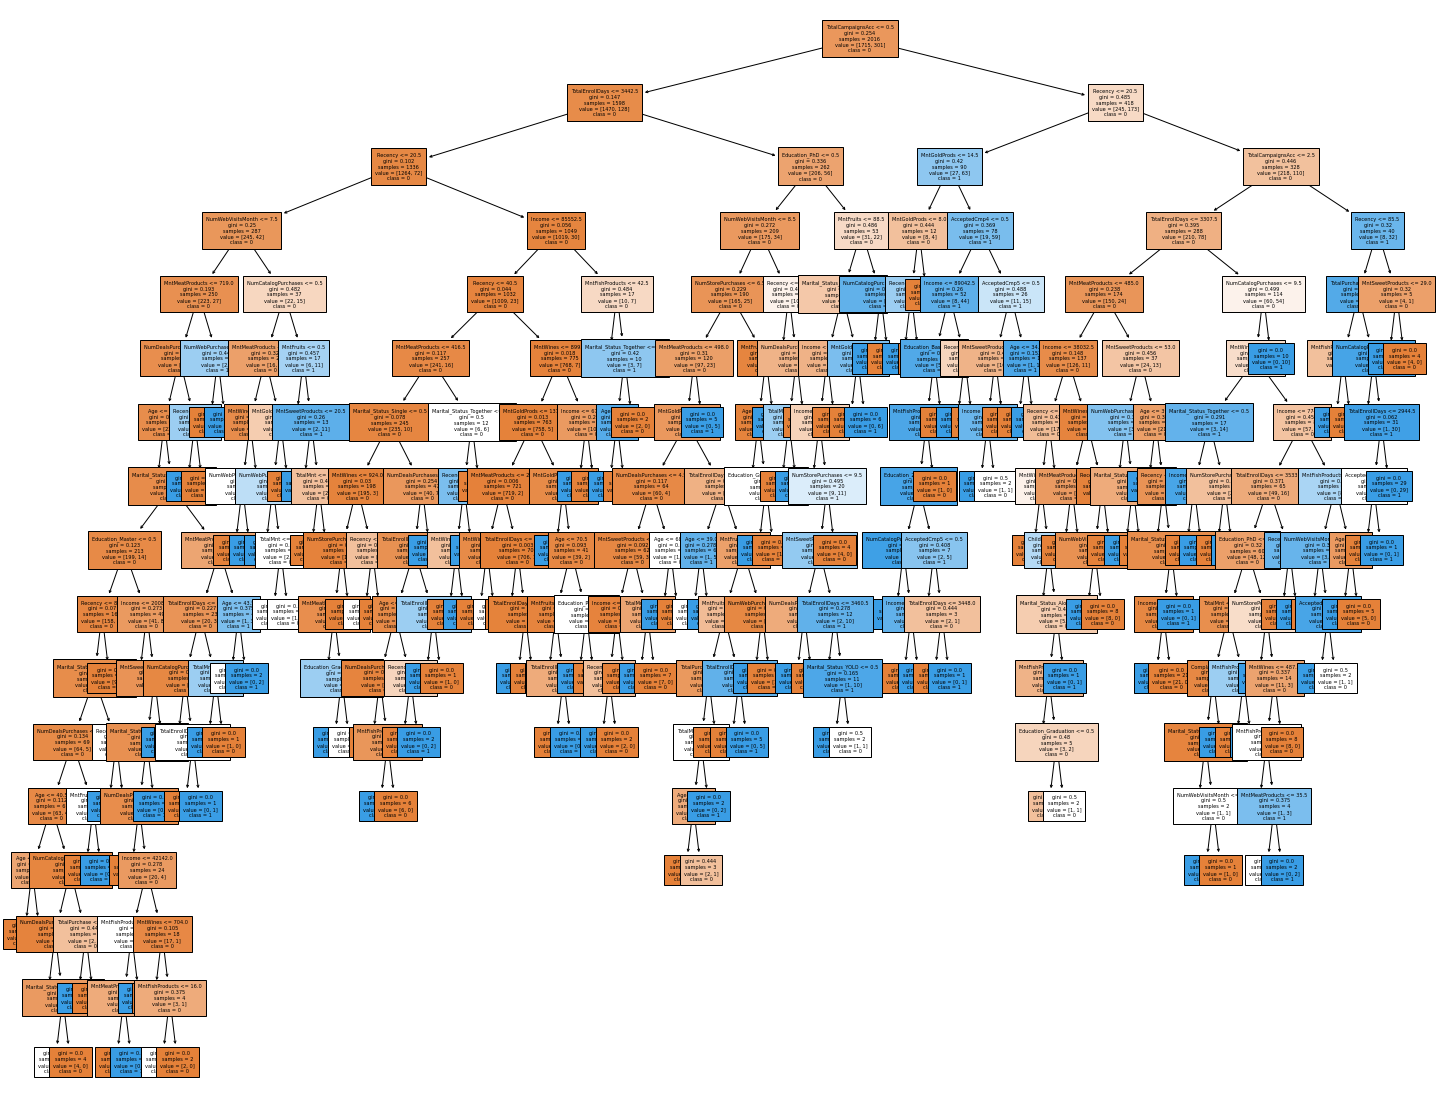

In [38]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=one_hot_encoded_df.columns,  
                   class_names=class_names,
                   filled=True, fontsize = 5)

**Six relevant features (i.e., 'TotalCampaignsAcc', 'TotalEnrollDays', 'Recency', 'Education_PhD', 'MntGoldProds', 'Income') which are at the top of decision tree has been selected for building the models.**

## Building the dataset for training models

In [40]:
columns = ['TotalCampaignsAcc', 'TotalEnrollDays', 'Recency', 'Education_PhD', 'MntGoldProds', 'Income']
df = one_hot_encoded_df[columns]
df

,TotalCampaignsAcc,TotalEnrollDays,Recency,Education_PhD,MntGoldProds,Income
0,0.0,3216.0,56.0,0.0,4.0,28691.0
1,1.0,3256.0,97.0,1.0,31.0,39665.0
2,0.0,2871.0,41.0,1.0,8.0,69283.0
3,0.0,3393.0,38.0,1.0,1.0,33581.0
4,0.0,3294.0,67.0,0.0,182.0,72354.0
...,...,...,...,...,...,...
2011,1.0,3127.0,53.0,0.0,33.0,77598.0
2012,0.0,3003.0,57.0,1.0,38.0,62670.0
2013,1.0,3411.0,31.0,1.0,124.0,44953.0
2014,0.0,3552.0,2.0,0.0,0.0,27469.0


## Spliting the data into training and cross validation set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, target[1], test_size = 0.20, random_state = 42,stratify = target[1])

from collections import Counter
Y_train = [str(x) for x in Y_train]
print('\n Training Data Class  Names:\t['+','.join(list(Counter(Y_train).keys()))+']\n')
clas_labels = [str(x) for  x in list(Counter(Y_train).values())]
print(' Instances in Individual Classes: '+','.join(clas_labels))

Y_test = [str(x) for x in Y_test]
print('\n Test Data Class  Names:\t['+','.join(list(Counter(Y_test).keys()))+']\n')
clas_labels = [str(x) for  x in list(Counter(Y_test).values())]
print(' Instances in Individual Classes: '+','.join(clas_labels))


 Training Data Class  Names:	[0,1]

 Instances in Individual Classes: 1371,241

 Test Data Class  Names:	[0,1]

 Instances in Individual Classes: 344,60


## Pipeline for classification models with parameter tuning techniques

In [58]:
class data_classification():
    def __init__(self, clf_opt='lr', para_tune_tech='grid'):
        self.clf_opt = clf_opt
        self.para_tune_tech = para_tune_tech

    # Selection of classifiers  
    def classification_pipeline(self):    
    # AdaBoost 
        if self.clf_opt=='ab':
            print('\n\t### Training AdaBoost Classifier ### \n')
#             be1 = svm.SVC(kernel='linear', class_weight='balanced',probability=True)      
            be1 = svm.SVC(kernel='rbf', C= 1, class_weight='balanced',probability=True) 
#             be2 = LogisticRegression(solver='liblinear',class_weight='balanced')
            be2 = LogisticRegression(solver='liblinear',class_weight='balanced',max_iter=500,multi_class='ovr')
#             be3 = DecisionTreeClassifier(max_depth=50)
            be3 = DecisionTreeClassifier(max_depth=150,ccp_alpha=0.00001)
#             clf = AdaBoostClassifier(algorithm='SAMME',n_estimators=100)            
            clf = AdaBoostClassifier(algorithm='SAMME.R',n_estimators=100)
            clf_parameters = {
                'base_estimator':(be1,be2,be3,None),
                'random_state':(0,10),
            }      
    # Decision Tree
        elif self.clf_opt=='dt':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = DecisionTreeClassifier(random_state=40) 
            clf_parameters = {
                'criterion':('gini', 'entropy'), 
                'max_features':('auto', 'sqrt', 'log2'),
#                 'max_depth':(10,40,45,60),
#                 'max_depth':(20,50,100,120),
                'max_depth':(150,200,250,500),
#                 'ccp_alpha':(0.009,0.01,0.05,0.1),
#                 'ccp_alpha':(0.005,0.15,0.5,1),
                'ccp_alpha':(0.001,0.002,0.003,0.004)
            } 
    # Logistic Regression 
        elif self.clf_opt=='lr':
            print('\n\t### Training Logistic Regression Classifier ### \n')
            clf = LogisticRegression(solver='liblinear',class_weight='balanced') 
            clf_parameters = {
                'random_state':(0,10),
#                 'max_iter':(100,200,400,500),
#                 'max_iter':(600,800,1000,1200),
                'max_iter':(750,850,1500),
                'multi_class':('auto', 'ovr'),
                'penalty':('l1', 'l2', 'elasticnet', 'none')
            }  
    # Multinomial Naive Bayes
        elif self.clf_opt=='nb':
            print('\n\t### Training Multinomial Naive Bayes Classifier ### \n')
            clf = MultinomialNB(fit_prior=True, class_prior=None)  
            clf_parameters = {
#                 'alpha':(0,1),
                'alpha':(0.001,0.01,0.1,0.5),
            }            
    # Random Forest 
        elif self.clf_opt=='rf':
            print('\n\t ### Training Random Forest Classifier ### \n')
            clf = RandomForestClassifier(max_features=None,class_weight='balanced')
            clf_parameters = {
                'criterion':('entropy','gini'),       
                'n_estimators':(30,50,100,120),
#                 'max_depth':(10,20,30,50,100,None),
                'max_depth':(80,150,200,250, None),
                'max_features':('auto', 'sqrt', 'log2', None)
            }          
    # Support Vector Machine  
        elif self.clf_opt=='svm': 
            print('\n\t### Training SVM Classifier ### \n')
            clf = svm.SVC(class_weight='balanced', probability=True)  
            clf_parameters = {
                'C':(0.001,0.1,1),
                'kernel':('linear', 'rbf','poly','sigmoid'),
            }
    # k-Nearest Neighbors
        elif self.clf_opt=='knn':
            print('\n\t### Training k-nearest Neighbor Classifier ### \n')
            clf = KNeighborsClassifier()  
            clf_parameters = {
#                 'n_neighbors':(5,10,15,20),
                'n_neighbors':(25,50,75,100),
                'weights':('uniform', 'distance'),
                'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
#                 'leaf_size':(10,20,50,100)
                'leaf_size':(25,75,200,500)
            }
    # Artificial Neural Networks
        elif self.clf_opt=='ann':
            print('\n\t### Training Artificial Neural Networks ### \n')
            clf = MLPClassifier(shuffle=True, random_state=21)  
            clf_parameters = {
                'hidden_layer_sizes':([15,20,10], [50,40,30,20], [100,200,50]),
                
                'activation':('identity', 'logistic', 'tanh', 'relu'),
                'solver':('lbfgs', 'sgd', 'adam'),
                'alpha':(0.0001, 0.0005, 0.01,1)
            }
        else:
            print('Select a valid classifier \n')
            sys.exit(0)        
        return clf,clf_parameters
           
    def classification(self,X_train, X_test, Y_train, Y_test):
        clf,clf_parameters = self.classification_pipeline()
    # Grid Search
        if self.para_tune_tech=='grid':
            tech = GridSearchCV(clf, clf_parameters, scoring='accuracy', cv=10)
            tech.fit(X_train, Y_train)     
            clf = tech.best_estimator_
            print('\n\n The best set of parameters of the pipiline are: ')
            print(clf)
            predicted = clf.predict(X_test)
    # Random Search
        elif self.para_tune_tech=='random':
            tech = RandomizedSearchCV(clf, clf_parameters, scoring = 'accuracy', cv=10)
            tech.fit(X_train, Y_train)     
            clf = tech.best_estimator_
            print('\n\n The best set of parameters of the pipiline are: ')
            print(clf)
            predicted = clf.predict(X_test)
        else:
            print('Select a valid parameter tuning technique\n')
            sys.exit(0)

    # Evaluation
        class_names=list(Counter(Y_test).keys())
        class_names = [str(x) for x in class_names] 
        print('\n The classes are: ')
        print(class_names) 
    # Evaluation
        print('\n *************** Confusion Matrix ***************  \n')
        print (confusion_matrix(Y_test, predicted))     
        print('\n ***************  Scores on Test Data  *************** \n ')
        print(classification_report(Y_test, predicted, target_names=class_names))

## Logistic Regression using Grid Search

In [145]:
start = time.time()
clf = data_classification(clf_opt='lr', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start), "sec")


	### Training Logistic Regression Classifier ### 



 The best set of parameters of the pipiline are: 
LogisticRegression(class_weight='balanced', max_iter=750, penalty='l1',
                   random_state=10, solver='liblinear')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[280  64]
 [ 13  47]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       344
           1       0.42      0.78      0.55        60

    accuracy                           0.81       404
   macro avg       0.69      0.80      0.71       404
weighted avg       0.88      0.81      0.83       404

The time of execution of above program is : 8.643579244613647 sec


- Accuracy for the best set of parameters of the pipiline: LogisticRegression(class_weight='balanced', max_iter=500, penalty='l1', random_state=10, solver='liblinear') is 0.81
- Accuracy for the best set of parameters of the pipiline: LogisticRegression(class_weight='balanced', max_iter=600,  penalty='l1', random_state=10, solver='liblinear') is 0.81
- Accuracy for the best set of parameters of the pipiline: LogisticRegression(class_weight='balanced', max_iter=750,  penalty='l1', random_state=10, solver='liblinear') is 0.81

## Logistic Regression using Random Search

In [146]:
start = time.time()
clf = data_classification(clf_opt='lr', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start), "sec")


	### Training Logistic Regression Classifier ### 



 The best set of parameters of the pipiline are: 
LogisticRegression(class_weight='balanced', max_iter=850, multi_class='ovr',
                   penalty='l1', random_state=10, solver='liblinear')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[280  64]
 [ 13  47]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       344
           1       0.42      0.78      0.55        60

    accuracy                           0.81       404
   macro avg       0.69      0.80      0.71       404
weighted avg       0.88      0.81      0.83       404

The time of execution of above program is : 2.2918801307678223 sec


- Accuracy for the best set of parameters of the pipiline:  LogisticRegression(class_weight='balanced', max_iter=500, multi_class='ovr', penalty='l1', random_state=10, solver='liblinear') is 0.81
- Accuracy for the best set of parameters of the pipiline:  LogisticRegression(class_weight='balanced', max_iter=800, multi_class='ovr', penalty='l1', random_state=10, solver='liblinear') is 0.81
- Accuracy for the best set of parameters of the pipiline:  LogisticRegression(class_weight='balanced', max_iter=850, multi_class='ovr', penalty='l1', random_state=10, solver='liblinear') is 0.81

## Decision Tree using Grid Search

In [151]:
start = time.time()
clf = data_classification(clf_opt='dt', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start), "sec")


	### Training Logistic Regression Classifier ### 



 The best set of parameters of the pipiline are: 
DecisionTreeClassifier(ccp_alpha=0.002, max_depth=150, max_features='auto',
                       random_state=40)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[341   3]
 [ 41  19]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       344
           1       0.86      0.32      0.46        60

    accuracy                           0.89       404
   macro avg       0.88      0.65      0.70       404
weighted avg       0.89      0.89      0.87       404

The time of execution of above program is : 5.280925512313843 sec


- Accuracy for the best set of parameters of the pipiline DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy', max_depth=10, max_features='auto', random_state=40) is 0.85
- Accuracy for the best set of parameters of the pipiline DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=20, max_features='auto', random_state=40) is 0.87
- Accuracy for the best set of parameters of the pipiline DecisionTreeClassifier(ccp_alpha=0.002, criterion='entropy', max_depth=150, max_features='auto', random_state=40) is 0.89

## Decision Tree using Random Search

In [152]:
start = time.time()
clf = data_classification(clf_opt='dt', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start), "sec")


	### Training Logistic Regression Classifier ### 



 The best set of parameters of the pipiline are: 
DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', max_depth=250,
                       max_features='log2', random_state=40)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[339   5]
 [ 39  21]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       344
           1       0.81      0.35      0.49        60

    accuracy                           0.89       404
   macro avg       0.85      0.67      0.71       404
weighted avg       0.88      0.89      0.87       404

The time of execution of above program is : 0.5938804149627686 sec


- Accuracy for the best set of parameters of the pipiline DecisionTreeClassifier(ccp_alpha=0.009, criterion='entropy', max_depth=10, max_features='auto', random_state=40) is 0.85
- Accuracy for the best set of parameters of the pipiline DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=120, max_features='auto', random_state=40) is 0.88
- Accuracy for the best set of parameters of the pipiline DecisionTreeClassifier(ccp_alpha=0.003, criterion='entropy', max_depth=250, max_features='log2', random_state=40) is 0.89

## Random Forest using Grid Search

In [53]:
start = time.time()
clf = data_classification(clf_opt='rf', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")


	 ### Training Random Forest Classifier ### 



 The best set of parameters of the pipiline are: 
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=150, max_features='sqrt', n_estimators=120)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[333  11]
 [ 33  27]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       344
           1       0.71      0.45      0.55        60

    accuracy                           0.89       404
   macro avg       0.81      0.71      0.74       404
weighted avg       0.88      0.89      0.88       404

The time of execution of above program is : 6.465292823314667 min


- Accuracy for the best set of parameters of the pipiline RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=50) is 0.89
- Accuracy for the best set of parameters of the pipiline RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=50, max_features='sqrt', n_estimators=120) is 0.89

## Random Forest using Random Search

In [54]:
start = time.time()
clf = data_classification(clf_opt='rf', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")


	 ### Training Random Forest Classifier ### 



 The best set of parameters of the pipiline are: 
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=80, max_features='log2', n_estimators=120)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[335   9]
 [ 34  26]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       344
           1       0.74      0.43      0.55        60

    accuracy                           0.89       404
   macro avg       0.83      0.70      0.74       404
weighted avg       0.88      0.89      0.88       404

The time of execution of above program is : 0.45282748142878215 min


- Accuracy for the best set of parameters of the pipiline RandomForestClassifier(class_weight='balanced', max_depth=50, max_features='log2') is 0.89
- Accuracy for the best set of parameters of the pipiline RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=250, n_estimators=120) is 0.89

## Multinomial Naive Bayes using Grid Search

In [56]:
start = time.time()
clf = data_classification(clf_opt='nb', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")


	### Training Multinomial Naive Bayes Classifier ### 



 The best set of parameters of the pipiline are: 
MultinomialNB(alpha=0.001)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[213 131]
 [ 22  38]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       344
           1       0.22      0.63      0.33        60

    accuracy                           0.62       404
   macro avg       0.57      0.63      0.53       404
weighted avg       0.81      0.62      0.68       404

The time of execution of above program is : 0.009914358456929525 min


- Accuracy for the best set of parameters of the pipiline MultinomialNB(alpha=0) is 0.62
- Accuracy for the best set of parameters of the pipiline MultinomialNB(alpha=0.001) is 0.62

## Multinomial Naive Bayes using Random Search

In [57]:
start = time.time()
clf = data_classification(clf_opt='nb', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")


	### Training Multinomial Naive Bayes Classifier ### 



 The best set of parameters of the pipiline are: 
MultinomialNB(alpha=0.001)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[213 131]
 [ 22  38]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.62      0.74       344
           1       0.22      0.63      0.33        60

    accuracy                           0.62       404
   macro avg       0.57      0.63      0.53       404
weighted avg       0.81      0.62      0.68       404

The time of execution of above program is : 0.0035935759544372557 min


- Accuracy for the best set of parameters of the pipiline MultinomialNB(alpha=0) is 0.62
- Accuracy for the best set of parameters of the pipiline MultinomialNB(alpha=0.001) is 0.62

## Support Vector Machine using Grid Search

In [47]:
start = time.time()
clf = data_classification(clf_opt='svm', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/3600, "hrs")


	### Training SVM Classifier ### 

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ...........C=0.001, kernel=linear;, score=0.617 total time= 3.8min
[CV 2/10] END ...........C=0.001, kernel=linear;, score=0.623 total time= 3.5min
[CV 3/10] END ...........C=0.001, kernel=linear;, score=0.528 total time= 4.7min
[CV 4/10] END ...........C=0.001, kernel=linear;, score=0.609 total time= 4.6min
[CV 5/10] END ...........C=0.001, kernel=linear;, score=0.646 total time= 3.8min
[CV 6/10] END ...........C=0.001, kernel=linear;, score=0.466 total time= 3.8min
[CV 7/10] END ...........C=0.001, kernel=linear;, score=0.615 total time= 4.3min
[CV 8/10] END ...........C=0.001, kernel=linear;, score=0.596 total time= 4.6min
[CV 9/10] END ...........C=0.001, kernel=linear;, score=0.584 total time= 4.3min
[CV 10/10] END ..........C=0.001, kernel=linear;, score=0.627 total time= 5.9min
[CV 1/10] END ..............C=0.001, kernel=rbf;, score=0.148 total time=   0.6s
[CV 2/10] 

[CV 1/10] END .................C=1, kernel=poly;, score=0.741 total time=   0.3s
[CV 2/10] END .................C=1, kernel=poly;, score=0.716 total time=   0.4s
[CV 3/10] END .................C=1, kernel=poly;, score=0.671 total time=   0.3s
[CV 4/10] END .................C=1, kernel=poly;, score=0.671 total time=   0.3s
[CV 5/10] END .................C=1, kernel=poly;, score=0.745 total time=   0.3s
[CV 6/10] END .................C=1, kernel=poly;, score=0.646 total time=   0.3s
[CV 7/10] END .................C=1, kernel=poly;, score=0.758 total time=   0.4s
[CV 8/10] END .................C=1, kernel=poly;, score=0.745 total time=   0.3s
[CV 9/10] END .................C=1, kernel=poly;, score=0.689 total time=   0.3s
[CV 10/10] END ................C=1, kernel=poly;, score=0.752 total time=   0.3s
[CV 1/10] END ..............C=1, kernel=sigmoid;, score=0.574 total time=   0.2s
[CV 2/10] END ..............C=1, kernel=sigmoid;, score=0.562 total time=   0.2s
[CV 3/10] END ..............

- Accuracy for the best set of parameters of the pipiline SVC(C=0.001, class_weight='balanced', kernel='poly', probability=True) is 0.79

## Support Vector Machine using Random Search

In [48]:
clf = data_classification(clf_opt='svm', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)


	### Training SVM Classifier ### 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END .................C=1, kernel=poly;, score=0.741 total time=   0.4s
[CV 2/10] END .................C=1, kernel=poly;, score=0.716 total time=   0.4s
[CV 3/10] END .................C=1, kernel=poly;, score=0.671 total time=   0.4s
[CV 4/10] END .................C=1, kernel=poly;, score=0.671 total time=   0.3s
[CV 5/10] END .................C=1, kernel=poly;, score=0.745 total time=   0.4s
[CV 6/10] END .................C=1, kernel=poly;, score=0.646 total time=   0.3s
[CV 7/10] END .................C=1, kernel=poly;, score=0.758 total time=   0.3s
[CV 8/10] END .................C=1, kernel=poly;, score=0.745 total time=   0.3s
[CV 9/10] END .................C=1, kernel=poly;, score=0.689 total time=   0.4s
[CV 10/10] END ................C=1, kernel=poly;, score=0.752 total time=   0.3s
[CV 1/10] END ............C=0.1, kernel=sigmoid;, score=0.438 total time=   0.5s
[CV 2/10] 



 The best set of parameters of the pipiline are: 
SVC(C=1, class_weight='balanced', probability=True)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[291  53]
 [ 32  28]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       344
           1       0.35      0.47      0.40        60

    accuracy                           0.79       404
   macro avg       0.62      0.66      0.63       404
weighted avg       0.82      0.79      0.80       404



- Accuracy for the best set of parameters of the pipiline SVC(C=1, class_weight='balanced', probability=True) is 0.79

## AdaBoost Classifier using Grid Search

In [117]:
clf = data_classification(clf_opt='ab', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)


	### Training AdaBoost Classifier ### 



 The best set of parameters of the pipiline are: 
AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[336   8]
 [ 33  27]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       344
           1       0.77      0.45      0.57        60

    accuracy                           0.90       404
   macro avg       0.84      0.71      0.76       404
weighted avg       0.89      0.90      0.89       404



In [160]:
start = time.time()
clf = data_classification(clf_opt='ab', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/3600, "hrs")


	### Training AdaBoost Classifier ### 



 The best set of parameters of the pipiline are: 
AdaBoostClassifier(n_estimators=100, random_state=0)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[334  10]
 [ 34  26]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       344
           1       0.72      0.43      0.54        60

    accuracy                           0.89       404
   macro avg       0.81      0.70      0.74       404
weighted avg       0.88      0.89      0.88       404

The time of execution of above program is : 0.3709187525510788 hrs


- Accuracy for the best set of parameters of the pipiline AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0) is 0.90
- Accuracy for the best set of parameters of the pipiline AdaBoostClassifier(algorithm='SAMME.R', n_estimators=100, random_state=0) is 0.89

## AdaBoost Classifier using Random Search

In [120]:
clf = data_classification(clf_opt='ab', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)


	### Training AdaBoost Classifier ### 



 The best set of parameters of the pipiline are: 
AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[336   8]
 [ 33  27]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       344
           1       0.77      0.45      0.57        60

    accuracy                           0.90       404
   macro avg       0.84      0.71      0.76       404
weighted avg       0.89      0.90      0.89       404



In [161]:
start = time.time()
clf = data_classification(clf_opt='ab', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/3600, "hrs")


	### Training AdaBoost Classifier ### 



 The best set of parameters of the pipiline are: 
AdaBoostClassifier(n_estimators=100, random_state=0)

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[334  10]
 [ 34  26]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       344
           1       0.72      0.43      0.54        60

    accuracy                           0.89       404
   macro avg       0.81      0.70      0.74       404
weighted avg       0.88      0.89      0.88       404

The time of execution of above program is : 0.37005307363139256 hrs


- Accuracy for the best set of parameters of the pipiline AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0) is 0.90
- Accuracy for the best set of parameters of the pipiline AdaBoostClassifier(algorithm='SAMME.R', n_estimators=100, random_state=0) is 0.89

## K-Nearest Neighbors using Grid Search

In [59]:
start = time.time()
clf = data_classification(clf_opt='knn', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")


	### Training k-nearest Neighbor Classifier ### 



 The best set of parameters of the pipiline are: 
KNeighborsClassifier(leaf_size=25, n_neighbors=100, weights='distance')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[340   4]
 [ 48  12]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       344
           1       0.75      0.20      0.32        60

    accuracy                           0.87       404
   macro avg       0.81      0.59      0.62       404
weighted avg       0.86      0.87      0.84       404

The time of execution of above program is : 0.28339006900787356 min


- Accuracy for the best set of parameters of the pipiline KNeighborsClassifier(leaf_size=10, n_neighbors=20, weights='distance') is 0.87
- Accuracy for the best set of parameters of the pipiline KNeighborsClassifier(leaf_size=25, n_neighbors=100, weights='distance') is 0.87

## K-Nearest Neighbors using Random Search

In [60]:
start = time.time()
clf = data_classification(clf_opt='knn', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)
end = time.time()
print("The time of execution of above program is :", (end-start)/60, "min")


	### Training k-nearest Neighbor Classifier ### 



 The best set of parameters of the pipiline are: 
KNeighborsClassifier(algorithm='ball_tree', leaf_size=75, n_neighbors=100,
                     weights='distance')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[340   4]
 [ 48  12]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       344
           1       0.75      0.20      0.32        60

    accuracy                           0.87       404
   macro avg       0.81      0.59      0.62       404
weighted avg       0.86      0.87      0.84       404

The time of execution of above program is : 0.021557362874348958 min


- Accuracy for the best set of parameters of the pipiline KNeighborsClassifier(algorithm='brute', leaf_size=20, n_neighbors=20, weights='distance') is 0.87
- Accuracy for the best set of parameters of the pipiline KNeighborsClassifier(algorithm='ball_tree', leaf_size=25, n_neighbors=100, weights='distance') is 0.87

## Artificial Neural Networks using Grid Search

In [57]:
clf = data_classification(clf_opt='ann', para_tune_tech='grid')
clf.classification(X_train, X_test, Y_train, Y_test)


	### Training Artificial Neural Networks ### 



 The best set of parameters of the pipiline are: 
MLPClassifier(alpha=0.01, hidden_layer_sizes=100, random_state=21,
              solver='lbfgs')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[341   3]
 [ 45  15]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       344
           1       0.83      0.25      0.38        60

    accuracy                           0.88       404
   macro avg       0.86      0.62      0.66       404
weighted avg       0.88      0.88      0.85       404



 Accuracy is 0.88 when 'hidden_layer_sizes': ([15,20,10], [50,40,30,20], [100,200,50]) and 
 

## Artificial Neural Networks using Random Search

In [58]:
clf = data_classification(clf_opt='ann', para_tune_tech='random')
clf.classification(X_train, X_test, Y_train, Y_test)


	### Training Artificial Neural Networks ### 



 The best set of parameters of the pipiline are: 
MLPClassifier(activation='logistic', alpha=0.01, hidden_layer_sizes=100,
              random_state=21, solver='lbfgs')

 The classes are: 
['0', '1']

 *************** Confusion Matrix ***************  

[[344   0]
 [ 60   0]]

 ***************  Scores on Test Data  *************** 
 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       344
           1       0.00      0.00      0.00        60

    accuracy                           0.85       404
   macro avg       0.43      0.50      0.46       404
weighted avg       0.73      0.85      0.78       404



## Visualization of Accuracy of Different Classifiers

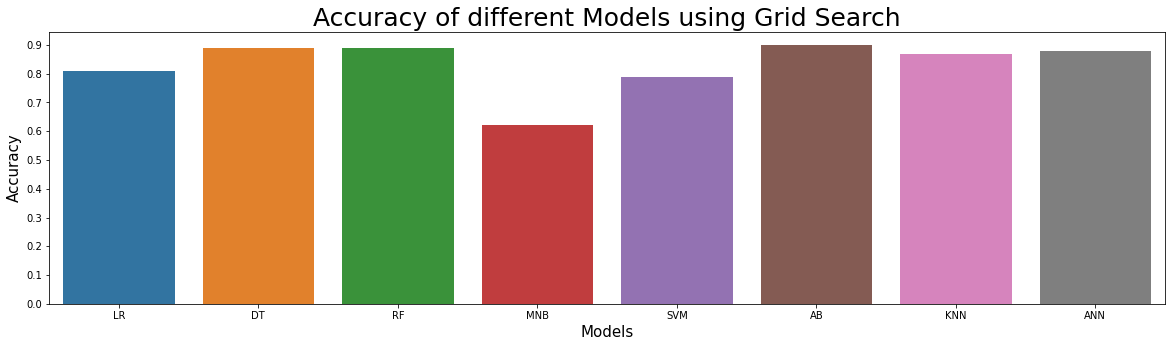

In [49]:
models = ['LR', 'DT', 'RF', 'MNB', 'SVM', 'AB', 'KNN', 'ANN']
accuracy = [0.81, 0.89, 0.89, 0.62, 0.79, 0.90, 0.87, 0.88]

plt.figure(figsize = (20, 5))
plt.title("Accuracy of different Models using Grid Search", fontsize = 25)

plt.xlabel("Models", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.yticks(np.arange(0, 2, 0.1))
sns.barplot(models, accuracy)
plt.show()

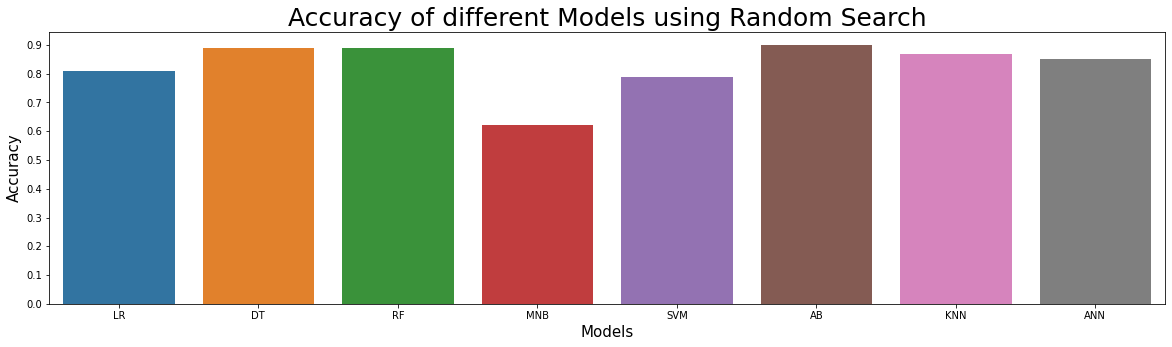

In [50]:
models = ['LR', 'DT', 'RF', 'MNB', 'SVM', 'AB', 'KNN', 'ANN']
accuracy = [0.81, 0.89, 0.89, 0.62, 0.79, 0.90, 0.87, 0.85]

plt.figure(figsize = (20, 5))
plt.title("Accuracy of different Models using Random Search", fontsize = 25)

plt.xlabel("Models", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.yticks(np.arange(0, 2, 0.1))
sns.barplot(models, accuracy)
plt.show()

**Among all the classifiers, the accuracy is highest for the AdaBoost Classifier with both Grid Search and Random Search. This is the best fit model on the validation set and hence it is considered as the high performing model with high performing parameter tuning as Random Search to predict the class labels of test set.**

## Prediction of Class Labels of Test Set

In [96]:
test = pd.read_csv("marketing_tst_data.csv")
test

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1961,Master,Together,"$74,881.00",1,1,3/8/13,48,54,505,...,9,0,2,12,5,0,0,0,0,0
1,1985,Master,Together,"$40,101.00",1,0,10/14/12,73,62,171,...,6,0,1,6,7,0,0,0,0,0
2,1957,Graduation,Married,"$62,187.00",0,0,7/5/13,49,126,792,...,4,0,8,5,3,0,0,0,0,0
3,1986,Graduation,Together,"$78,394.00",0,0,2/15/13,13,166,298,...,4,0,6,5,2,0,0,0,0,0
4,1950,Graduation,Together,"$28,320.00",0,1,1/14/13,68,4,19,...,1,0,0,3,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1957,PhD,Married,NaN,2,1,11/19/12,4,53,230,...,7,0,2,8,9,0,0,0,0,0
220,1955,PhD,Married,"$59,821.00",0,1,4/12/13,11,35,629,...,11,0,2,7,8,0,0,0,0,0
221,1951,Graduation,Married,"$30,833.00",1,1,7/16/13,33,6,11,...,1,0,0,3,5,0,0,0,0,0
222,1972,Graduation,Together,"$84,906.00",0,0,10/4/13,98,76,997,...,5,0,6,12,2,1,1,1,0,0


In [97]:
# Cleaning up column names that contain whitespace
test.columns = test.columns.str.replace(' ', '')

In [98]:
# Transform Income column to a numerical
test["Income"] = test["Income"].str.replace('$', '')
test["Income"] = test["Income"].str.replace(",", "").astype(float)

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           224 non-null    int64  
 1   Education            224 non-null    object 
 2   Marital_Status       224 non-null    object 
 3   Income               221 non-null    float64
 4   Kidhome              224 non-null    int64  
 5   Teenhome             224 non-null    int64  
 6   Dt_Customer          224 non-null    object 
 7   Recency              224 non-null    int64  
 8   MntGoldProds         224 non-null    int64  
 9   MntWines             224 non-null    int64  
 10  MntFruits            224 non-null    int64  
 11  MntFishProducts      224 non-null    int64  
 12  MntSweetProducts     224 non-null    int64  
 13  MntMeatProducts      224 non-null    int64  
 14  NumDealsPurchases    224 non-null    int64  
 15  NumWebPurchases      224 non-null    int

3 null values are present.

## Fixing the null values

In [100]:
test['Income']=test['Income'].fillna(df['Income'].median())
test

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1961,Master,Together,74881.0,1,1,3/8/13,48,54,505,...,9,0,2,12,5,0,0,0,0,0
1,1985,Master,Together,40101.0,1,0,10/14/12,73,62,171,...,6,0,1,6,7,0,0,0,0,0
2,1957,Graduation,Married,62187.0,0,0,7/5/13,49,126,792,...,4,0,8,5,3,0,0,0,0,0
3,1986,Graduation,Together,78394.0,0,0,2/15/13,13,166,298,...,4,0,6,5,2,0,0,0,0,0
4,1950,Graduation,Together,28320.0,0,1,1/14/13,68,4,19,...,1,0,0,3,8,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1957,PhD,Married,51390.0,2,1,11/19/12,4,53,230,...,7,0,2,8,9,0,0,0,0,0
220,1955,PhD,Married,59821.0,0,1,4/12/13,11,35,629,...,11,0,2,7,8,0,0,0,0,0
221,1951,Graduation,Married,30833.0,1,1,7/16/13,33,6,11,...,1,0,0,3,5,0,0,0,0,0
222,1972,Graduation,Together,84906.0,0,0,10/4/13,98,76,997,...,5,0,6,12,2,1,1,1,0,0


## Transforming Features as training set

In [101]:
# Converting datatype of Dt_Customer column to DataTime Format
test['Dt_Customer'] = pd.to_datetime(test['Dt_Customer'])

In [102]:
# Age of customer
test.rename(columns = {'Year_Birth':'Age'}, inplace = True)
test['Age'] = test.Age.apply(lambda x: 2022-x)

In [103]:
# Performing feature engineering.
test['Children'] = test['Kidhome'] + test['Teenhome']
test = test.drop(['Kidhome', 'Teenhome'], axis = 1)

In [104]:
# Total number of days since enrollment of a customer with the company.
test.rename(columns = {'Dt_Customer':'TotalEnrollDays'}, inplace = True)
test['TotalEnrollDays'] = pd.to_datetime(date.today()) - test['TotalEnrollDays']
test['TotalEnrollDays'] = [int(str(test['TotalEnrollDays'][x])[:4]) for x in test.index]

In [105]:
# The total amount spend in the last 2 years.
mnt_col = [i for i in test.columns if 'Mnt' in i]
test['TotalMnt'] = test[mnt_col].sum(axis=1)

In [106]:
# The total number of purchases made.
purchase_col = [j for j in test.columns if 'Purchase' in j]
test['TotalPurchase'] = test[purchase_col].sum(axis=1)

In [107]:
# The total campaigns in which customer accepted the offer.
campaigns_col = [c for c in test.columns if 'Cmp' in c]
test['TotalCampaignsAcc'] = test[campaigns_col].sum(axis=1)

In [108]:
# View the customer with new features.
test[['Age', 'Children', 'TotalEnrollDays', 'TotalMnt', 'TotalPurchase', 'TotalCampaignsAcc']]

,Age,Children,TotalEnrollDays,TotalMnt,TotalPurchase,TotalCampaignsAcc
0,61,2,3334,964,27,0
1,37,1,3479,415,17,0
2,65,0,3215,1283,18,0
3,36,0,3355,1428,16,0
4,72,1,3387,43,5,0
...,...,...,...,...,...,...
219,65,3,3443,603,29,0
220,67,1,3299,734,26,0
221,71,2,3204,28,6,0
222,50,0,3124,1631,24,3


## One Hot Encoder

In [109]:
one_hot_encoded_test = pd.get_dummies(test, columns = ['Education', 'Marital_Status'])
one_hot_encoded_test = one_hot_encoded_test.astype(float)
one_hot_encoded_test

,Age,Income,TotalEnrollDays,Recency,MntGoldProds,MntWines,MntFruits,MntFishProducts,MntSweetProducts,MntMeatProducts,...,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,61.0,74881.0,3334.0,48.0,54.0,505.0,72.0,36.0,27.0,270.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,37.0,40101.0,3479.0,73.0,62.0,171.0,3.0,26.0,24.0,129.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,65.0,62187.0,3215.0,49.0,126.0,792.0,0.0,45.0,45.0,275.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,36.0,78394.0,3355.0,13.0,166.0,298.0,27.0,216.0,24.0,697.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,72.0,28320.0,3387.0,68.0,4.0,19.0,1.0,3.0,2.0,14.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,65.0,51390.0,3443.0,4.0,53.0,230.0,42.0,49.0,37.0,192.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
220,67.0,59821.0,3299.0,11.0,35.0,629.0,0.0,0.0,0.0,70.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
221,71.0,30833.0,3204.0,33.0,6.0,11.0,0.0,3.0,1.0,7.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
222,50.0,84906.0,3124.0,98.0,76.0,997.0,15.0,99.0,30.0,414.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Selecting same features as used in training data

In [110]:
test_df = one_hot_encoded_test[columns]
test_df

,TotalCampaignsAcc,TotalEnrollDays,Recency,Education_PhD,MntGoldProds,Income
0,0.0,3334.0,48.0,0.0,54.0,74881.0
1,0.0,3479.0,73.0,0.0,62.0,40101.0
2,0.0,3215.0,49.0,0.0,126.0,62187.0
3,0.0,3355.0,13.0,0.0,166.0,78394.0
4,0.0,3387.0,68.0,0.0,4.0,28320.0
...,...,...,...,...,...,...
219,0.0,3443.0,4.0,1.0,53.0,51390.0
220,0.0,3299.0,11.0,1.0,35.0,59821.0
221,0.0,3204.0,33.0,0.0,6.0,30833.0
222,3.0,3124.0,98.0,0.0,76.0,84906.0


## Predicting the class labels of training data using AdaBoost Clssifier

In [119]:
clf = AdaBoostClassifier(algorithm='SAMME',n_estimators=100, random_state=0)
clf.fit(df, target[1])

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=0)

In [120]:
predictions = clf.predict(test_df)
predictions = predictions.reshape(224, 1)
predictions

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

## Saving the predicted class labels

In [128]:
text_file = open("Shraddha_Agarwal_labelfile.txt", "w")
for i in range(len(predictions+1)):
    text_file.write(str("d")+str(int(i+1))+","+str(int(predictions[i])) + "\n")
text_file.close()